<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Police_Killings_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,7)

In [2]:
terror_df = pd.read_csv("https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/police_killings.csv", encoding="ISO-8859-1")
terror_df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,32.529577,-86.362829,1,51,30902,1051030902,1051,Census Tract 309.02,Millbrook Police Department,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,79,11700,22079011700,22079,Census Tract 117,Rapides Parish Sheriff's Office,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,59,1200,55059001200,55059,Census Tract 12,Kenosha Police Department,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,6,37,535607,6037535607,6037,Census Tract 5356.07,South Gate Police Department,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,153,530800,39153530800,39153,Census Tract 5308,Kent Police Department,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [3]:
terror_df.shape

(467, 34)

In [4]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  467 non-null    object 
 1   age                   467 non-null    object 
 2   gender                467 non-null    object 
 3   raceethnicity         467 non-null    object 
 4   month                 467 non-null    object 
 5   day                   467 non-null    int64  
 6   year                  467 non-null    int64  
 7   streetaddress         463 non-null    object 
 8   city                  467 non-null    object 
 9   state                 467 non-null    object 
 10  latitude              467 non-null    float64
 11  longitude             467 non-null    float64
 12  state_fp              467 non-null    int64  
 13  county_fp             467 non-null    int64  
 14  tract_ce              467 non-null    int64  
 15  geo_id                4

In [5]:
terror_df.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,15.830835,2015.0,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0.0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,1.000000,2015.0,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015.0,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,32625.000000,43804.000000,0.645365,1.000000,1.000000,0.068592,0.106167
50%,16.000000,2015.0,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,42759.000000,50856.000000,0.869612,2.000000,2.000000,0.105181,0.169544
75%,23.000000,2015.0,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,56190.000000,56832.000000,1.081454,4.000000,3.000000,0.140833,0.284542
max,31.000000,2015.0,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [6]:
cols = terror_df.columns.to_list()
cols

['name',
 'age',
 'gender',
 'raceethnicity',
 'month',
 'day',
 'year',
 'streetaddress',
 'city',
 'state',
 'latitude',
 'longitude',
 'state_fp',
 'county_fp',
 'tract_ce',
 'geo_id',
 'county_id',
 'namelsad',
 'lawenforcementagency',
 'cause',
 'armed',
 'pop',
 'share_white',
 'share_black',
 'share_hispanic',
 'p_income',
 'h_income',
 'county_income',
 'comp_income',
 'county_bucket',
 'nat_bucket',
 'pov',
 'urate',
 'college']

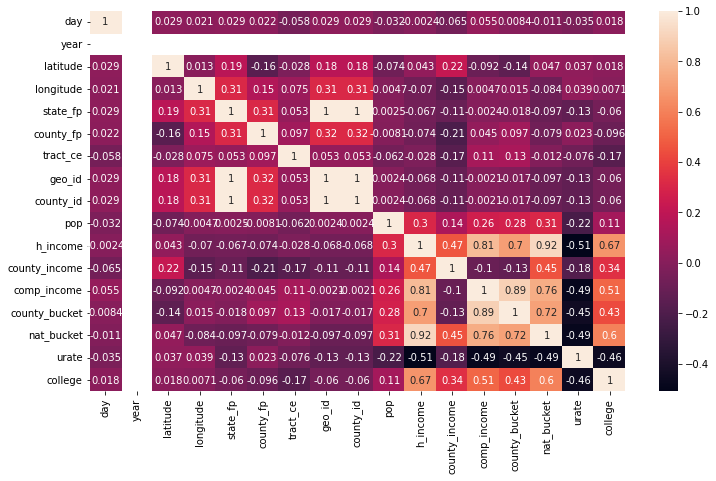

In [11]:
sns.heatmap(terror_df.corr(),annot=True, cmap='rocket')

In [12]:
terror_df.corr()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
day,1.000000,NaN,0.029321,0.021429,0.029371,0.021988,-0.058018,0.029453,0.029454,-0.031663,-0.002360,-0.064636,0.054925,0.008447,-0.010772,-0.035306,0.017997
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.029321,NaN,1.000000,0.012573,0.185303,-0.156597,-0.027713,0.183890,0.183890,-0.073946,0.042618,0.224363,-0.091790,-0.143763,0.046744,0.036648,0.017695
longitude,0.021429,NaN,0.012573,1.000000,0.310790,0.151161,0.075069,0.311137,0.311135,-0.004706,-0.069887,-0.145852,0.004732,0.015272,-0.084427,0.039479,0.007114
state_fp,0.029371,NaN,0.185303,0.310790,1.000000,0.313978,0.052846,0.999981,0.999981,0.002453,-0.067187,-0.107791,-0.002411,-0.017730,-0.097182,-0.128593,-0.059654
county_fp,0.021988,NaN,-0.156597,0.151161,0.313978,1.000000,0.096544,0.319886,0.319884,-0.008063,-0.074145,-0.205515,0.045357,0.097474,-0.078586,0.022929,-0.096432
tract_ce,-0.058018,NaN,-0.027713,0.075069,0.052846,0.096544,1.000000,0.053389,0.053369,-0.061683,-0.028484,-0.166069,0.111043,0.127012,-0.011906,-0.076079,-0.166968
geo_id,0.029453,NaN,0.183890,0.311137,0.999981,0.319886,0.053389,1.000000,1.000000,0.002394,-0.067534,-0.108918,-0.002106,-0.017045,-0.097495,-0.128176,-0.060165
county_id,0.029454,NaN,0.183890,0.311135,0.999981,0.319884,0.053369,1.000000,1.000000,0.002395,-0.067533,-0.108914,-0.002109,-0.017048,-0.097495,-0.128174,-0.060162
pop,-0.031663,NaN,-0.073946,-0.004706,0.002453,-0.008063,-0.061683,0.002394,0.002395,1.000000,0.304894,0.137411,0.263094,0.276956,0.308150,-0.223491,0.106512


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


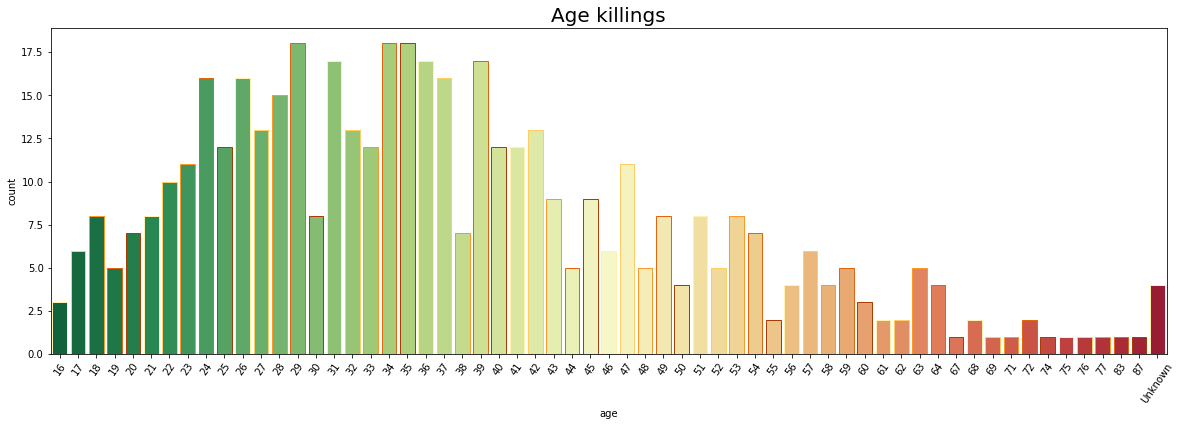

In [14]:
#Let's first check killing based on age 
plt.subplots(figsize=(20,6))
sns.countplot('age',data = terror_df.sort_values(by="age"), palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=55)
plt.title('Age killings',size=20)
plt.show()

In [15]:
#Let's check the male/ female ratio of police-killed 
class_counts = terror_df["gender"].value_counts()
class_counts

Male      445
Female     22
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2bca6aa250>,
 [Text(0.861112086724274, -0.6844603524656243, 'Male'),
  Text(-0.9080818875936947, 0.7217944897436338, 'Female')],
 [Text(0.4696975018496039, -0.373342010435795, '95.3%'),
  Text(-0.5166672808722745, 0.410676175198964, '4.7%')])

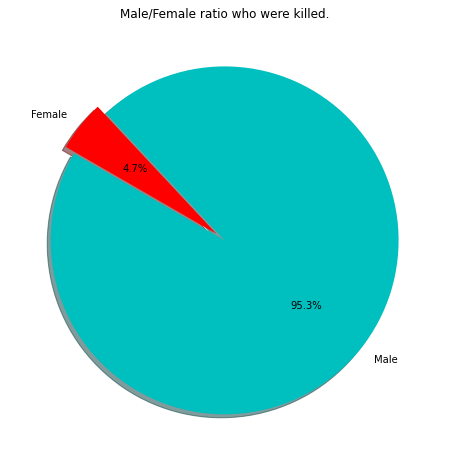

In [17]:
plt.figure(figsize=(15,8))
plt.title('Male/Female ratio who were killed.')
plt.pie(class_counts, labels = class_counts.index, autopct='%1.1f%%', startangle=150, shadow=True, explode=[0,.06], colors=["c","r"])

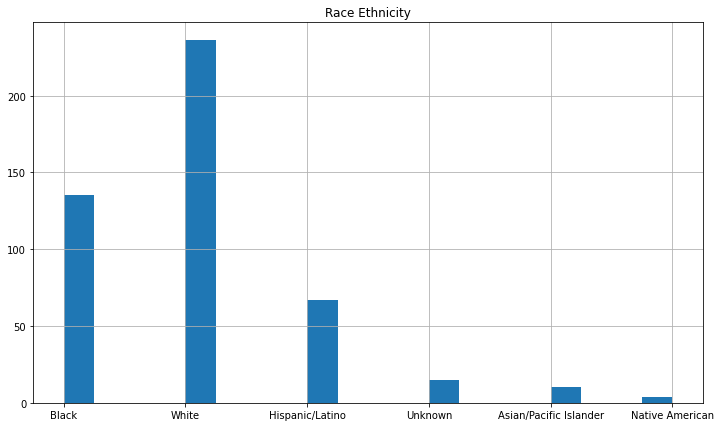

In [19]:
#Let's check Race ethnicity Difference now
terror_df['raceethnicity'].hist(bins=20)
plt.title("Race Ethnicity")
plt.show()

([<matplotlib.patches.Wedge at 0x7f2bca4a43d0>,
 [Text(-0.5339016902939477, -0.9617426813349118, 'White'),
  Text(1.0052007358814687, 0.44673423932283707, 'Black'),
  Text(-0.22532391724927942, 1.0766750356144792, 'Hispanic/Latino'),
  Text(-0.7561605869131024, 0.7988874556526926, 'Unknown'),
  Text(-0.8792160254313829, 0.6610440080846677, 'Asian/Pacific Islander'),
  Text(-0.9374850613562402, 0.5754318028523333, 'Native American')],
 [Text(-0.29121910379669874, -0.52458691709177, '50.5%'),
  Text(0.548291310480801, 0.2436732214488202, '28.9%'),
  Text(-0.1229039548632433, 0.5872772921533522, '14.3%'),
  Text(-0.4124512292253285, 0.4357567939923777, '3.2%'),
  Text(-0.47957237750802695, 0.3605694589552732, '2.1%'),
  Text(-0.5113554880124946, 0.31387189246490904, '0.9%')])

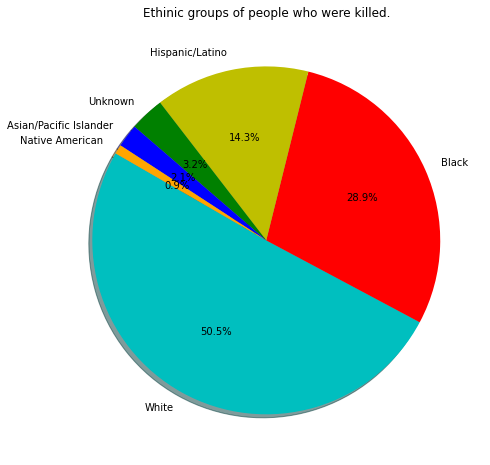

In [20]:
#Let's check the male/ female ratio of police-killed 
ethinic_counts = terror_df["raceethnicity"].value_counts()

plt.figure(figsize=(15,8))
plt.title('Ethinic groups of people who were killed.')
plt.pie(ethinic_counts, labels = ethinic_counts.index, autopct='%1.1f%%', startangle=150, shadow=True, explode=None, colors=["c","r","y","g","b","orange"])

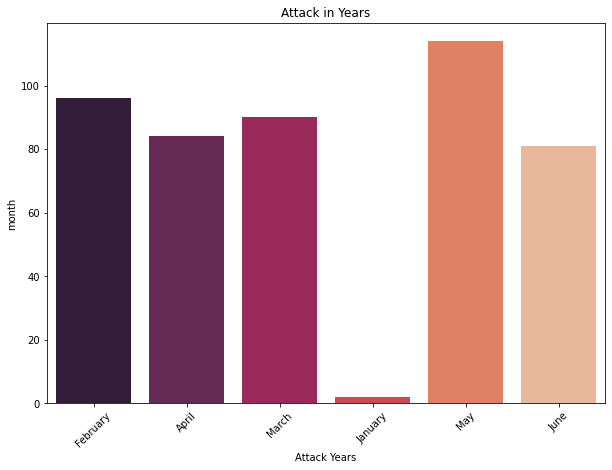

In [21]:
#Barplot

x_year = terror_df['month'].unique()
y_year = terror_df['month'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(10,7))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of people killed each year")
plt.xticks(rotation=45)
sns.barplot(x=x_year, y=y_year, palette= 'rocket')
plt.show()

In [22]:
terror_df["state"].nunique()

47

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


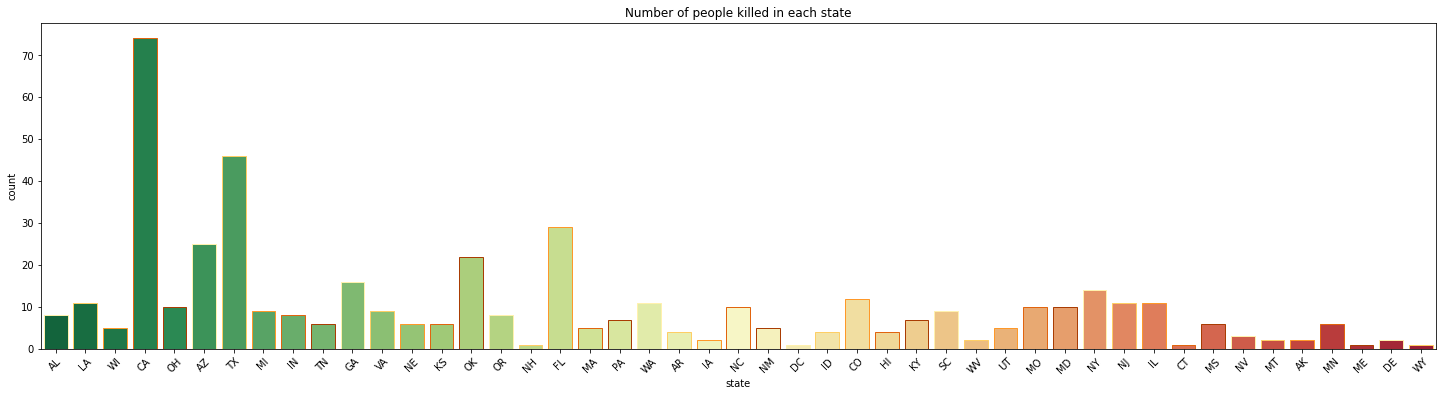

In [23]:
#Let's map which state had most incidents
#Countplot
plt.subplots(figsize=(25,6))
sns.countplot('state',data = terror_df, palette= 'RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('Number of people killed in each state')
plt.show()

In [24]:
city_killed = terror_df.city.value_counts()[1:25]
city_killed

Phoenix          6
Houston          6
Oklahoma City    4
Tulsa            4
Indianapolis     4
San Francisco    4
New York         4
St Louis         3
Kansas City      3
Columbus         3
Omaha            3
Bakersfield      3
Austin           3
San Antonio      3
El Paso          3
Harvey           3
Memphis          3
Fort Worth       3
Columbia         3
Stockton         3
Atlanta          3
Charleston       2
Gastonia         2
Smyrna           2
Name: city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


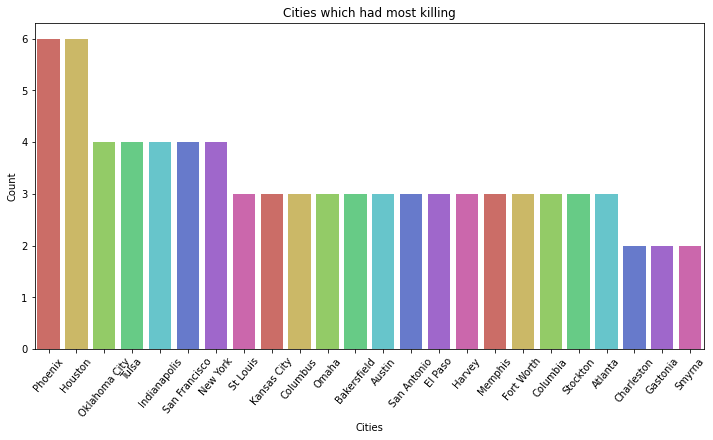

In [25]:
plt.subplots(figsize=(12,6))
sns.barplot(city_killed.index, city_killed.values, palette=sns.color_palette("hls", 8))
plt.title('Cities which had most killing')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 50)
plt.show()

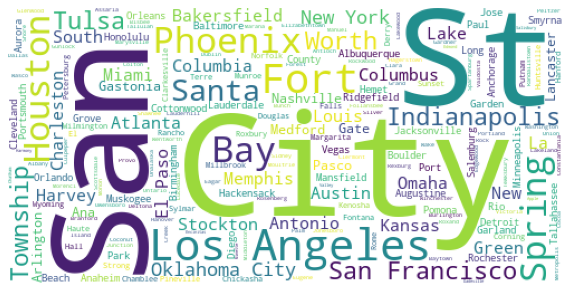

In [26]:
from wordcloud import WordCloud
from scipy import signal
cities=terror_df.city.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [27]:
law_groups = terror_df["lawenforcementagency"].value_counts()[:10]
law_groups


Los Angeles Police Department                  10
Oklahoma City Police Department                 5
US Marshals Service                             5
Los Angeles County Sheriff's Department         5
Fort Worth Police Department                    4
Phoenix Police Department                       4
Indianapolis Metropolitan Police Department     4
New York Police Department                      4
El Paso Police Department                       3
Riverside County Sheriff's Department           3
Name: lawenforcementagency, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


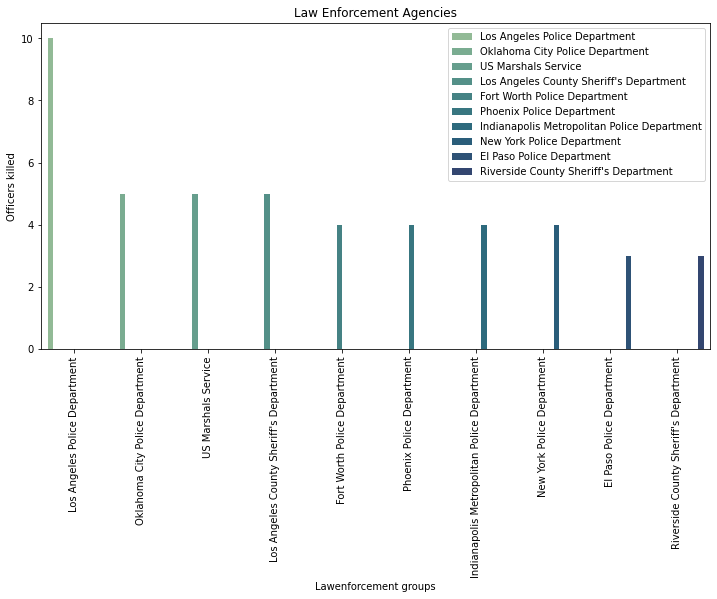

In [28]:
plt.subplots(figsize=(12,6))
sns.barplot(law_groups.index, law_groups.values,palette="crest", hue = law_groups.index)
plt.title('Law Enforcement Agencies')
plt.xlabel('Lawenforcement groups')
plt.ylabel('Officers killed')
plt.xticks(rotation= 90)
plt.show()


In [29]:
armed_data = terror_df['armed'].value_counts()
armed_data

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

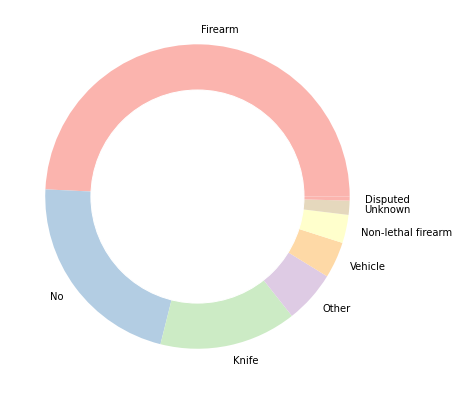

In [31]:
from palettable.colorbrewer.qualitative import Pastel1_7

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(armed_data.values, labels=armed_data.index, colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [32]:
caused = terror_df['cause'].value_counts()
caused

Gunshot              411
Taser                 27
Death in custody      14
Struck by vehicle     12
Unknown                3
Name: cause, dtype: int64

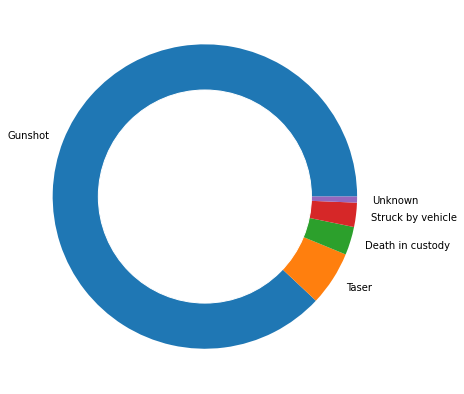

In [33]:
from palettable.colorbrewer.qualitative import Pastel1_7
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(caused.values, labels=caused.index)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## The major cause of death was gunshot